In [1]:
# import my library
import pandas as pd
import numpy as np
import network_analysis as net
import networkx as nx
import matplotlib.pyplot as plt
import random
import umap.umap_ as umap
%matplotlib inline


In [2]:
# set some filepaths for network creation
ChR2_of = '/home/ryansenne/PycharmProjects/Networks2/csv_files/ChR2_Large_Box.csv'
control_of = '/home/ryansenne/PycharmProjects/Networks2/csv_files/Control_Large_Box.csv'
chr2_small =  '/home/ryansenne/PycharmProjects/Networks2/csv_files/ChR2_Small_Box.csv'
control_small =  '/home/ryansenne/PycharmProjects/Networks2/csv_files/Control_Small_Box.csv'
innate_recall =  '/home/ryansenne/PycharmProjects/Networks2/csv_files/innate_recall.csv'
# innate_recall = r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\innate_recall.csv'

In [3]:
 # THIS IS FOR TEST PURPOSES ONLY
# allen_groups = pd.read_csv('/Users/ryansenne/PycharmProjects/networkx/csv_files/ROIs.csv')
control_data, control_nodes = net.loadData(control_of)
control_rvals, p = net.corrMatrix(control_data, corr_type='Spearman', z_trans=False)
threshold_matrix = net.significanceCheck(p, control_rvals, 1, names=control_nodes, include_Negs=True)
control_per = net.percentile(threshold_matrix, 0.25)
control_G = net.networx(control_per, control_nodes)

chr2_data, chr2_nodes = net.loadData(ChR2_of)
rvals1, p1 = net.corrMatrix(chr2_data, corr_type='Spearman', z_trans=False)
threshold_matrix1 = net.significanceCheck(p1, rvals1, 1, names=chr2_nodes, include_Negs=True)
per1 = net.percentile(threshold_matrix1, 0.25)
chr2_G = net.networx(per1, chr2_nodes)

chr2_data_small, chr2_nodes_small = net.loadData(chr2_small)
rvals1_small, p1_small = net.corrMatrix(chr2_data_small, corr_type='Spearman', z_trans=False)
threshold_matrix1_small = net.significanceCheck(p1_small, rvals1_small, 1, names=chr2_nodes_small, include_Negs=True)
per1_small = net.percentile(threshold_matrix1_small, 0.25)
chr2_G_small = net.networx(per1_small, chr2_nodes_small)

control_data_small, control_nodes_small = net.loadData(control_small)
control_rvals_small, p_small = net.corrMatrix(control_data_small, corr_type='Spearman', z_trans=False)
threshold_matrix_small = net.significanceCheck(p_small, control_rvals_small, 1, names=control_nodes_small, include_Negs=True)
control_per_small = net.percentile(threshold_matrix_small, 0.25)
control_G_small = net.networx(control_per_small, control_nodes)

ir_data, ir_nodes = net.loadData(innate_recall)
rvals2, p2 = net.corrMatrix(ir_data, corr_type='Spearman', z_trans=False)
threshold_matrix2 = net.significanceCheck(p2, rvals2, 1, names=ir_nodes, include_Negs=True)
per2 = net.percentile(threshold_matrix2, 0.25)
ir_G = net.networx(per2, ir_nodes)


In [4]:
import igraph as ig
r = ig.Graph.from_networkx(ir_G)
from tqdm import tqdm
mod = []
for i in tqdm(np.linspace(0.5, 1, 100)):
    test = r.community_leiden(n_iterations=100, objective_function='modularity', weights='weight', resolution=i)
    mod.append(test.modularity)
test = r.community_leiden(n_iterations=100, objective_function='modularity', weights='weight', resolution=np.linspace(0.5, 1.75, 100)[np.where(mod==np.max(mod))][0])


100%|██████████| 100/100 [00:02<00:00, 42.35it/s]


/home/ryansenne/PycharmProjects/Networks2/network_analysis/plotting_utils.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


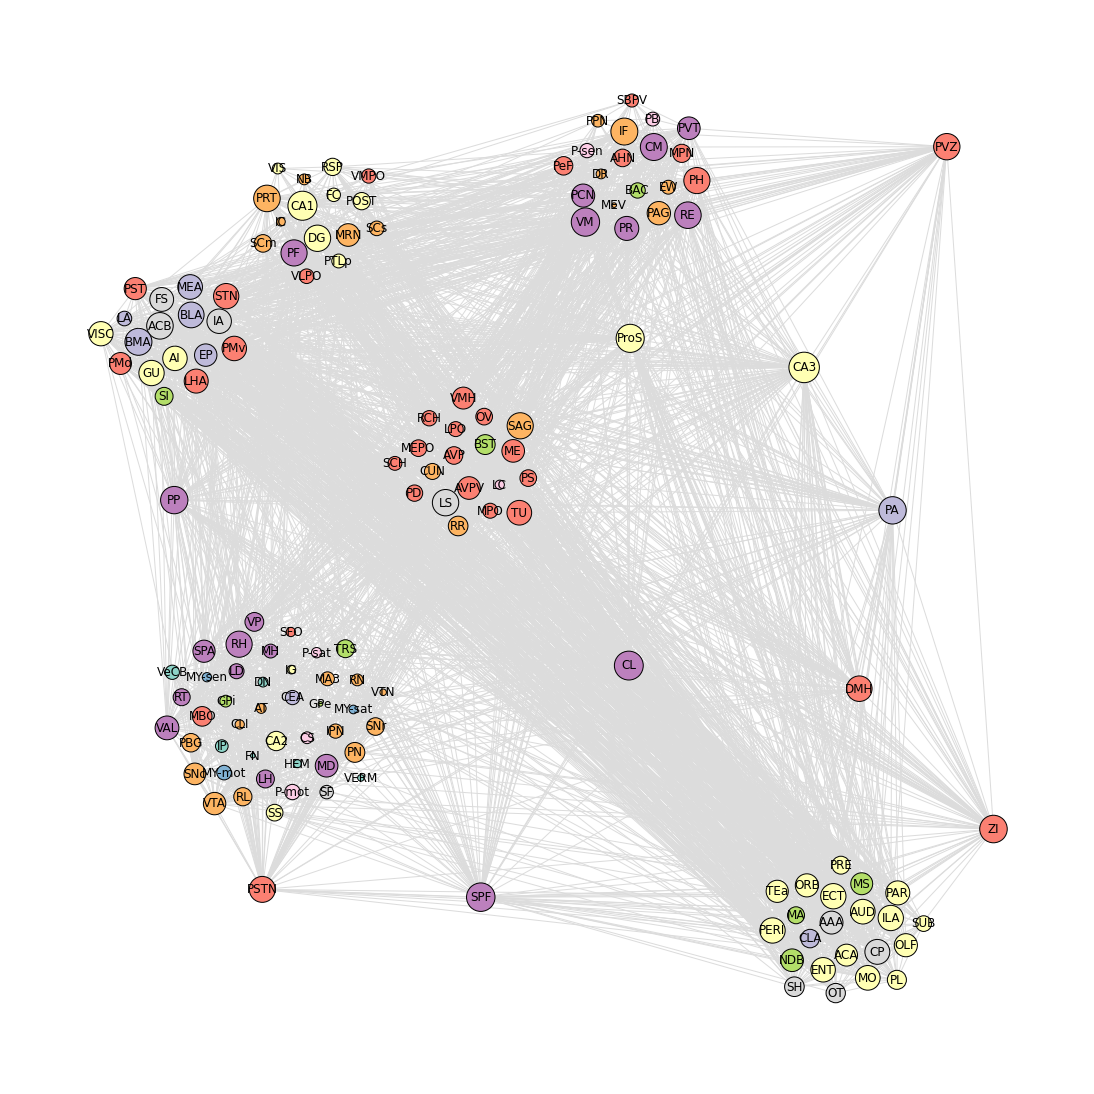

In [5]:
%matplotlib inline
my_allen_colors = net.get_allen_colors("/home/ryansenne/PycharmProjects/Networks2/csv_files/ROIs.csv")
grouped_indices = {value: [i for i,x in enumerate(test.membership) if x == value] for value in set(test.membership)}
list_tuples = [tuple(indices) for indices in grouped_indices.values()]

pos_dict = net.get_position_data(list_tuples, chr2_nodes)
ir_G.remove_edges_from(nx.selfloop_edges(ir_G))
net.graph_network(ir_G, my_allen_colors, pos_dict)

In [ ]:
test.membership

In [ ]:
ig.drawing.plot(test.graph)

In [ ]:
hist = plt.figure()
plt.hist(rvals1_small[np.tril_indices(147, k=1)], bins=20, color='blue')

In [ ]:
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP(n_neighbors=15)

In [ ]:
data = StandardScaler().fit_transform(np.vstack((rvals1, rvals1_small, control_rvals, control_rvals_small, rvals2)))
# data = StandardScaler().fit_transform(np.vstack((per2, per1, per1_small, control_per, control_per_small)))
# data = StandardScaler().fit_transform(rvals1_small)
embedding = reducer.fit_transform(data)


In [ ]:
umap_plot_1, u_ax_1 = plt.subplots()
u_ax_1.scatter(embedding[:,0], embedding[:,1], s=30, linewidths=0.25, edgecolors='black')

In [ ]:
import seaborn as sns
%matplotlib widget
color_ind=np.zeros(147*4)
color_ind[0:146]=0
color_ind[147:147*2]=1
color_ind[147*2:147*3]=2
color_ind[147*3:147*4]=3
color_ind[147*4:147*5]=4
col_pal = [sns.color_palette()[int(i)] for i in color_ind]

indiv_col = np.unique(my_allen_colors)

umap_plot, u_ax = plt.subplots()
u_ax.scatter(embedding[:147,0], embedding[:147,1], c=my_allen_colors, s=30, linewidths=0.25, edgecolors='black')
u_ax.scatter(embedding[147:147*2,0], embedding[147:147*2,1],c=my_allen_colors,s=30, linewidths=0.25, edgecolors='black')
u_ax.scatter(embedding[147*2:147*3,0], embedding[147*2:147*3,1],c=my_allen_colors,s=30, linewidths=0.25, edgecolors='black')
u_ax.scatter(embedding[147*3:147*4,0], embedding[147*3:147*4,1],c=my_allen_colors,s=30,linewidths=0.25, edgecolors='black')
# u_ax.scatter(embedding[147*4:147*5,0], embedding[147*4:147*5,1],c='#C9877E',s=30,linewidths=0.25, edgecolors='black')
# u_ax.legend(['LB ChR2', 'SB ChR2', 'LB Control', 'SB Control'])
u_ax.set_xlabel('UMAP 1')
u_ax.set_ylabel('UMAP 2')

umap_plot.savefig('UMAP_region.svg')

In [ ]:
np.array(my_allen_colors)

In [ ]:
nx.triangles(chr2_G)

In [ ]:
net.Similarity(np.abs(nx.adj_matrix(chr2_G_small)), np.abs(nx.adj_matrix(ir_G)))

In [ ]:
nx.adj_matrix(ir_G).toarray()

In [ ]:
nx.jaccard_coefficient()

In [ ]:
degree_sequence = sorted((d for n, d in ir_G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)


ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.set_xlim(-3, 150)
ax1.set_ylim(-3, 90)
ax1.plot(degree_sequence, color='#C9877E',marker="o")
# ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.set_xlim(0, 90)
ax2.set_ylim(0, 12)
ax2.bar(*np.unique(degree_sequence, return_counts=True), color='#C9877E')
# ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

fig.savefig(r"C:\Users\Ryan Senne\Desktop\Figures\ir_G_degree_plots.svg")

In [ ]:
plt.figure()
plt.loglog(*np.unique(degree_sequence, return_counts=True), marker='o', linestyle='')
np.unique(degree_sequence, return_counts=True)

In [ ]:
control_lb_data, control_lb_nodes = net.loadData(control_lb)
control_rvals, p = net.corrMatrix(control_lb_data, corr_type='Spearman', z_trans=False)
threshold_matrix = net.significanceCheck(p, control_rvals, 1, names=control_nodes, include_Negs=True)
control_per = net.percentile(threshold_matrix, 0.25)
control_lb_G = net.networx(control_per, control_nodes)

# chr2_lb_data, chr2_lb_nodes = net.loadData(chr2_lb)
# rvals1, p1 = net.corrMatrix(chr2_lb_data, corr_type='Spearman', z_trans=False)
# threshold_matrix1 = net.significanceCheck(p1, rvals1, 1, names=chr2_lb_nodes, include_Negs=True)
# per1 = net.percentile(threshold_matrix1, 0.25)
# chr2_lb_G = net.networx(per1, chr2_nodes)

In [ ]:
ps = pd.read_csv(r'C:\Users\Ryan Senne\Downloads\SB_ROIs.csv')

In [ ]:
ps

In [ ]:
p_vals = ps['P value'].sort_values(ignore_index=True)

In [ ]:
plt.plot(np.arange(1, 13), p_vals, marker='o',linestyle='')
plt.plot(np.arange(1, 13), z(np.arange(1,13)))

In [ ]:
hc_control_clust = [[control_nodes[i] for i in j] for j in control_]
hc_chr2_cluster = [[chr2_nodes[i] for i in j] for j in chr2_]

In [ ]:
control_clust = [[control_nodes[i] for i in j] for j in control_max_mod_lou_comm]
chr2_cluster = [[chr2_nodes[i] for i in j] for j in chr2_max_mod_lou_comm]

In [ ]:
ir_cluster = [[ir_nodes[i] for i in j] for j in ir_max_mod_lou_comm]

In [ ]:
control_lb_clust = [[control_lb_nodes[i] for i in j] for j in control_lb_max_mod_lou_comm]
# chr2_cluster = [[chr2_nodes[i] for i in j] for j in chr2_max_mod_lou_comm]

In [ ]:
nx.algorithms.community.modularity(control_lb_G, control_lb_clust)

In [ ]:
nx.algorithms.community.modularity(chr2_G, chr2_cluster)

In [ ]:
nx.algorithms.community.modularity(ir_G, ir_cluster)

In [ ]:
random.shuffle(chr2_max_mod_lou_comm)
cont_pos_dict = net.get_position_data(control_max_mod_lou_comm, control_nodes, False)
chr2_pos_dict = net.get_position_data(chr2_max_mod_lou_comm, chr2_nodes, False)

my_allen_colors = net.get_allen_colors(r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ROIs.csv')


In [ ]:
chr2_G = r.to_networkx()
comm = [(i, j) for i,j in enumerate(test.membership)]
#
grouped_indices = {value: [i for i, x in enumerate(test.membership) if x == value] for value in set(test.membership)}
list_tuples = [tuple(indices) for indices in grouped_indices.values()]
# import pickle
# with open(r"C:\Users\ryansenne\Downloads\test (3)", "rb") as fp:   # Unpickling
#     b = pickle.load(fp)
# random.shuffle(b)
# Print the result
my_allen_colors = net.get_allen_colors(r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\ROIs.csv')
chr2_pos_dict = net.get_position_data(list_tuples, chr2_nodes, False)
ir_graph = net.graph_network(chr2_G_small, my_allen_colors, chr2_pos_dict)


In [ ]:
ir_graph.savefig('ir_G.svg')

In [ ]:
grouped_indices = {value: [i for i, x in enumerate(test.membership) if x == value] for value in set(test.membership)}
list_tuples = [tuple(indices) for indices in grouped_indices.values()]

In [33]:
import pickle
with open(r'C:\Users\ryansenne\Desktop\Graphs_KD\CSB_thresh_mod.pkl', 'rb') as q:
    G_ChLB, _ = pickle.load(q)

In [101]:
Control_SB_node_df = net.grab_node_attributes(G_ChLB, use_distance=False, compress_to_df=True)


In [129]:
Control_SB_node_df.to_csv('ChR2_LB_node_stats_no_thresh_.csv')

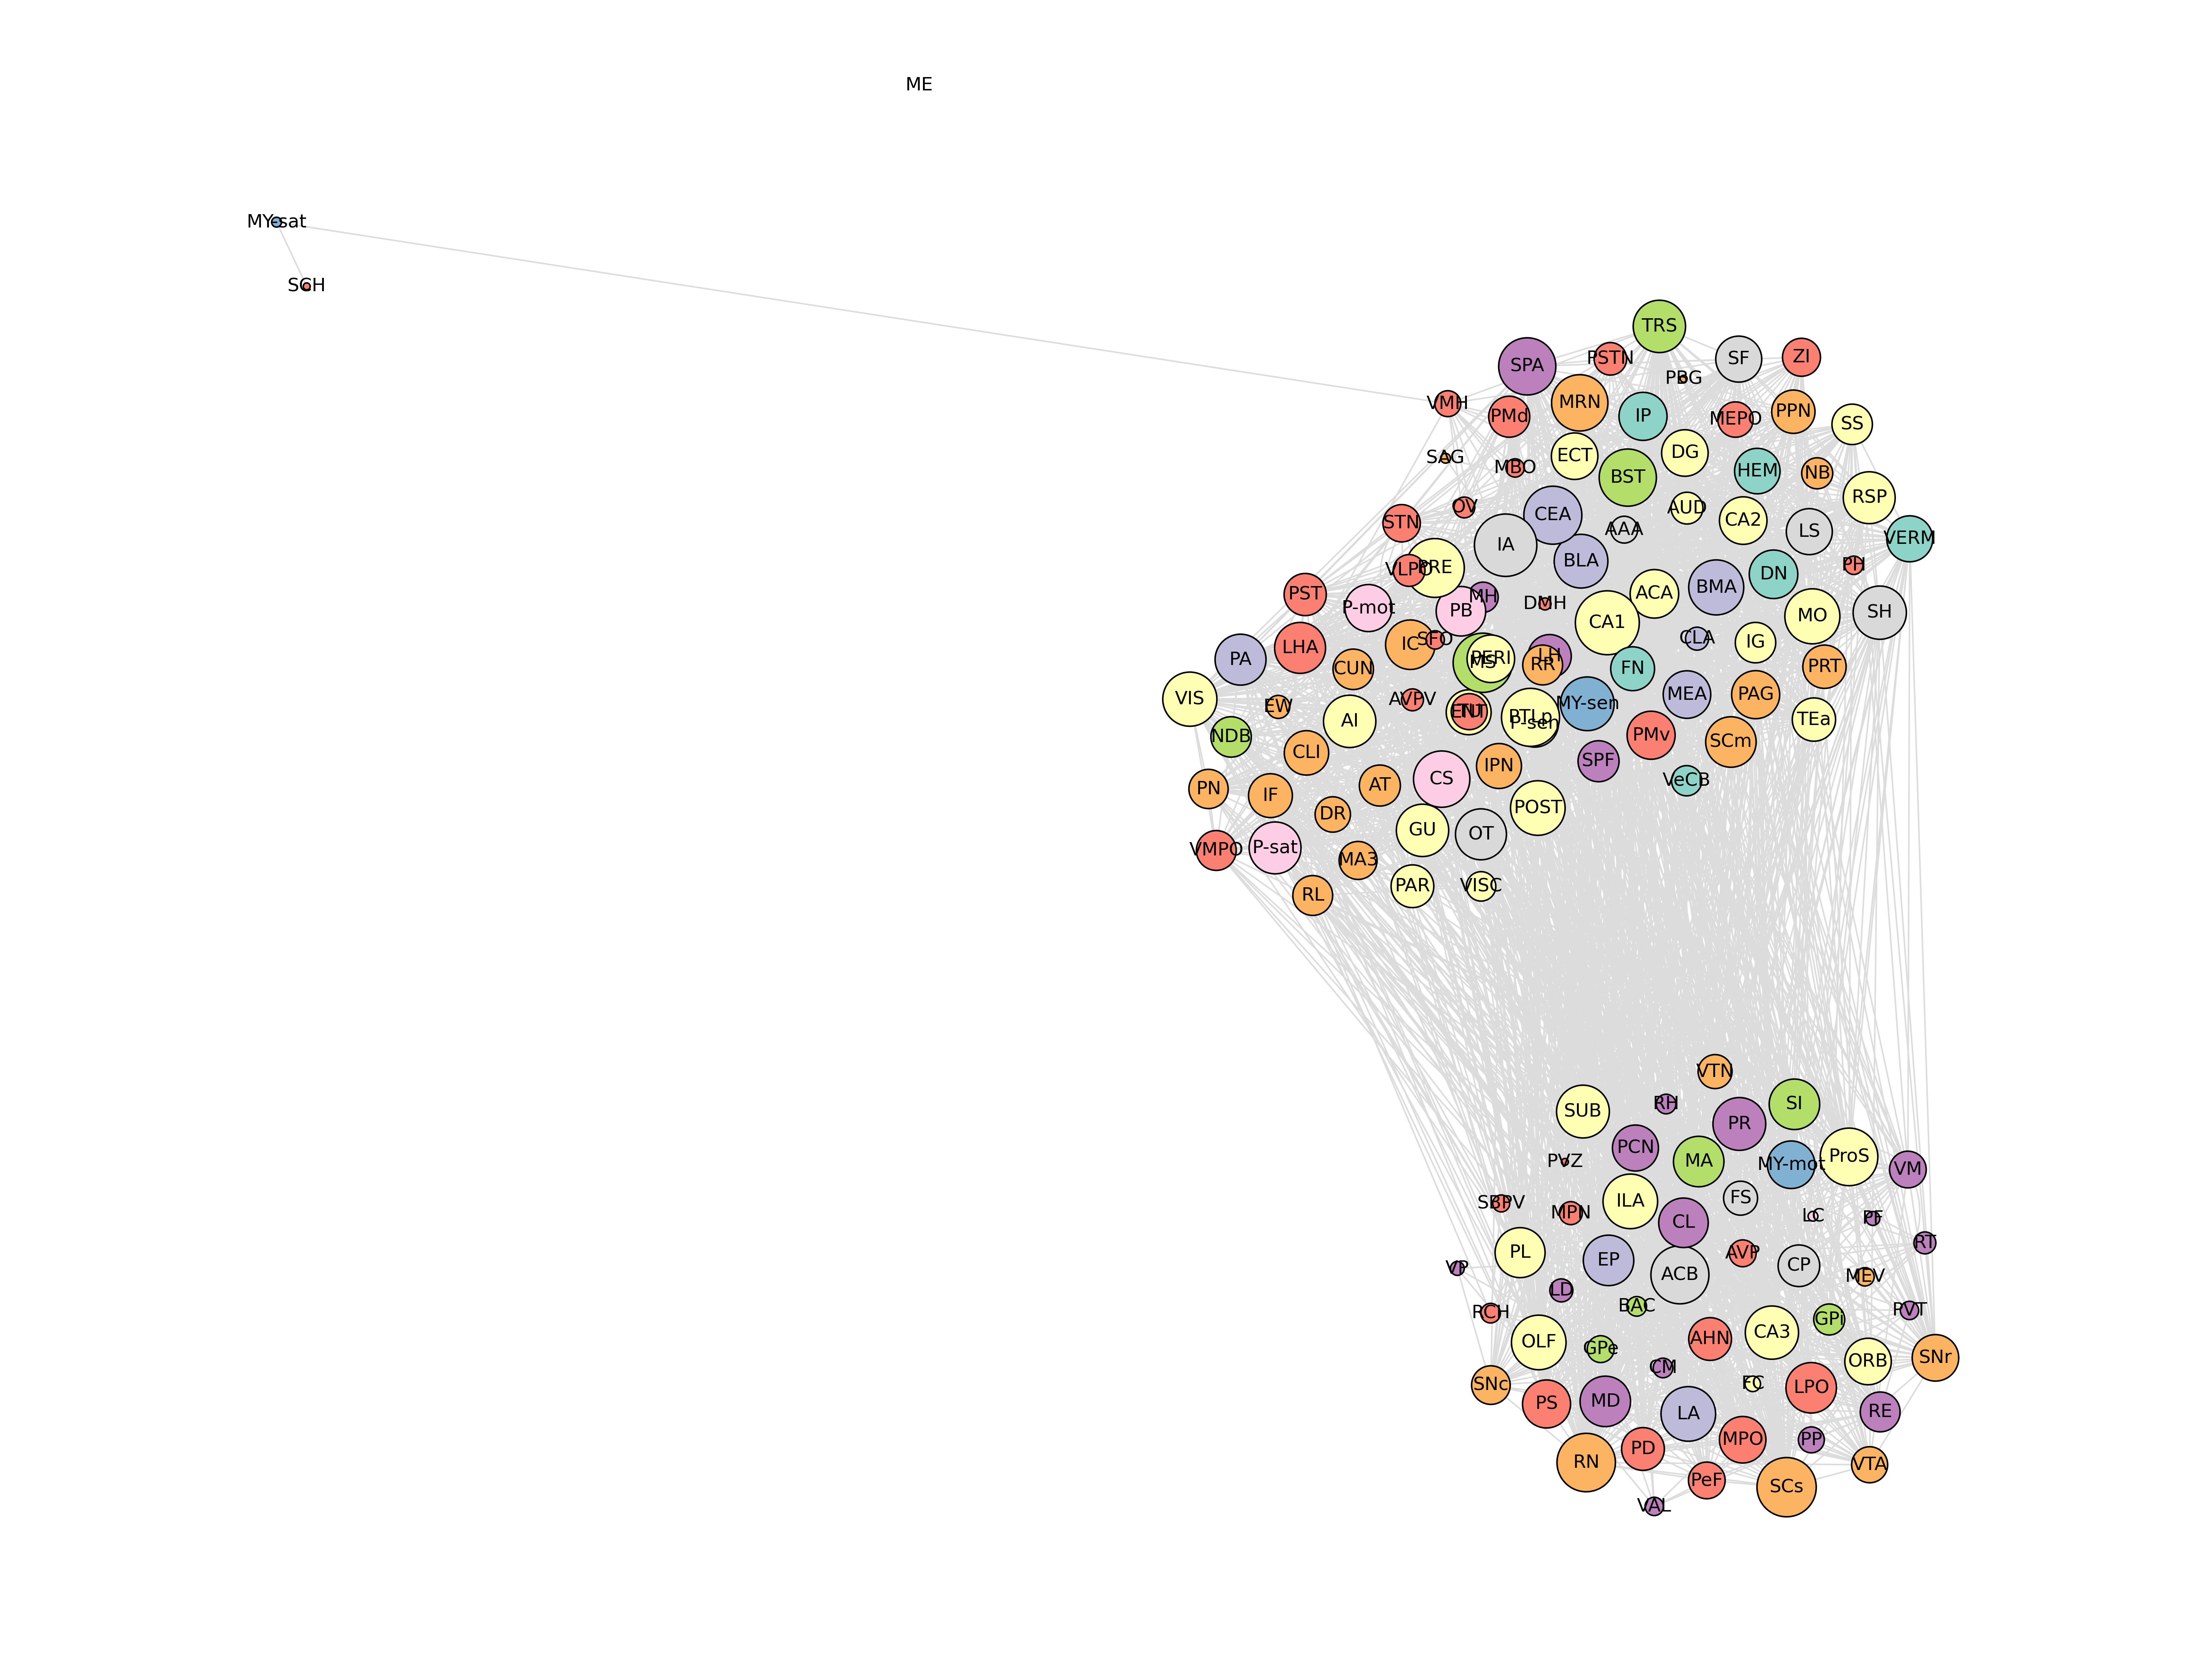

In [34]:
my_allen_colors = net.get_allen_colors(r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\ROIs.csv')
chr2_pos_dict = net.get_position_data(_, chr2_nodes, False)
ir_graph = net.graph_network(G_ChLB, my_allen_colors, chr2_pos_dict)